In [7]:
import pandas as pd

In [8]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os

# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [9]:
# df = pd.read_csv("/kaggle/input/dados-de-suicidios-entre-2010-e-2019/suicidios_2010_a_2019.csv", encoding = "utf-8")
# df.head()

In [10]:
df = pd.read_csv("C:/Users/marco/OneDrive/Documentos/GitHub/Datasus_ds/Suicide_2010_2019/datasus_df/suicidios_2010_a_2019.csv", encoding="utf-8")

C:\Users\marco\AppData\Local\Temp\ipykernel_16412\3711780389.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:/Users/marco/OneDrive/Documentos/GitHub/Datasus_ds/Suicide_2010_2019/datasus_df/suicidios_2010_a_2019.csv", encoding="utf-8")


In [11]:
df.head()

,Unnamed: 0,estado,ano,mes,DTOBITO,DTNASC,SEXO,RACACOR,ASSISTMED,ESCMAE,ESTCIV,ESC,OCUP,CODMUNRES,CAUSABAS,CAUSABAS_O,LOCOCOR,CIRURGIA
0,1,AC,2010,1,2010-01-31,1999-11-09,Masculino,Parda,NaN,NaN,Solteiro/a,1 a 3 anos,ESTUDANTE,Tarauacá,X780,X780,Via pública,Não
1,2,AC,2010,2,2010-02-07,1985-09-23,Masculino,Parda,NaN,NaN,Solteiro/a,1 a 3 anos,ESTUDANTE,Tarauacá,X780,X780,Hospital,Não
2,3,AC,2010,2,2010-02-19,1995-08-06,Masculino,Parda,NaN,NaN,Solteiro/a,1 a 3 anos,ESTUDANTE,Tarauacá,X780,X780,Hospital,Não
3,4,AC,2010,4,2010-04-20,1983-12-25,Feminino,Parda,NaN,NaN,Casado/a,1 a 3 anos,DONA DE CASA,Tarauacá,X780,X780,Domicílio,Não
4,5,AC,2010,7,2010-07-24,1982-05-13,Masculino,Parda,NaN,NaN,Casado/a,NaN,DONA DE CASA,Tarauacá,X720,X720,Domicílio,Não


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112491 entries, 0 to 112490
Data columns (total 18 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  112491 non-null  int64 
 1   estado      112491 non-null  object
 2   ano         112491 non-null  int64 
 3   mes         112491 non-null  int64 
 4   DTOBITO     112491 non-null  object
 5   DTNASC      101633 non-null  object
 6   SEXO        112469 non-null  object
 7   RACACOR     109320 non-null  object
 8   ASSISTMED   70687 non-null   object
 9   ESCMAE      15 non-null      object
 10  ESTCIV      103791 non-null  object
 11  ESC         84327 non-null   object
 12  OCUP        60274 non-null   object
 13  CODMUNRES   112491 non-null  object
 14  CAUSABAS    112491 non-null  object
 15  CAUSABAS_O  112204 non-null  object
 16  LOCOCOR     112031 non-null  object
 17  CIRURGIA    8549 non-null    object
dtypes: int64(3), object(15)
memory usage: 15.4+ MB


In [13]:
#We will remove the column "Unnamed: 0", "CAUSABAS", "CAUSABAS_O", "ESCMAE", "CIRURGIA".

df.drop(['Unnamed: 0', 'CAUSABAS', 'CAUSABAS_O', 'ESCMAE', 'CIRURGIA'], axis=1, inplace=True)
df.head(0)

,estado,ano,mes,DTOBITO,DTNASC,SEXO,RACACOR,ASSISTMED,ESTCIV,ESC,OCUP,CODMUNRES,LOCOCOR


In [14]:
#To change the column names

df.rename(columns={
                    'estado':'State',
                    'ano':'Year',
                    'mes':'Month',
                    'DTOBITO':'Death_date',
                    'DTNASC':'Born_date',
                    'SEXO':'Gender',
                    'RACACOR': 'Race',
                    'ASSISTMED':'Medical_assistance',
                    'ESTCIV':'Civil_state',
                    'ESC':'Schooling',
                    'OCUP':'Occupation',
                    'CODMUNRES':'City',
                    'LOCOCOR':'Local',
},inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112491 entries, 0 to 112490
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   State               112491 non-null  object
 1   Year                112491 non-null  int64 
 2   Month               112491 non-null  int64 
 3   Death_date          112491 non-null  object
 4   Born_date           101633 non-null  object
 5   Gender              112469 non-null  object
 6   Race                109320 non-null  object
 7   Medical_assistance  70687 non-null   object
 8   Civil_state         103791 non-null  object
 9   Schooling           84327 non-null   object
 10  Occupation          60274 non-null   object
 11  City                112491 non-null  object
 12  Local               112031 non-null  object
dtypes: int64(2), object(11)
memory usage: 11.2+ MB


In [16]:
df['Medical_assistance'].fillna('Em Branco', inplace=True)

In [17]:
medical_assistance = df['Medical_assistance']

#type(medical_assistance)

medical_assistance.value_counts()

Medical_assistance
Não          56318
Em Branco    41804
Sim          14369
Name: count, dtype: int64

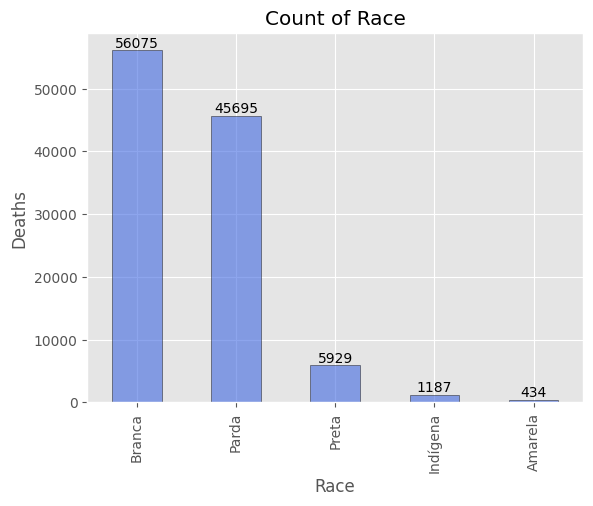

In [18]:
#Now let's start analyzing the processed data.

import matplotlib.pyplot as plt


counts = df['Race'].value_counts()

plt.style.use("ggplot")

ax = counts.plot(kind='bar', color='royalblue', ec = "k", alpha = .6)

ax.set_xlabel('Race')
ax.set_ylabel('Deaths')


ax.set_title('Count of Race')

for i, v in enumerate(counts):
    ax.annotate(str(v), (i, v), ha='center', va='bottom')

plt.show()

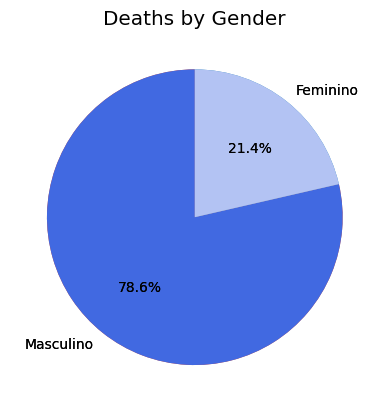

In [19]:
# Visualizando o genero que tiveram mais suicidio

counts = df['Gender'].value_counts()

plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)

colors = ['royalblue', '#b3c3f3',]

plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=colors)

plt.title('Deaths by Gender')

plt.show()

In [20]:
df.head()

,State,Year,Month,Death_date,Born_date,Gender,Race,Medical_assistance,Civil_state,Schooling,Occupation,City,Local
0,AC,2010,1,2010-01-31,1999-11-09,Masculino,Parda,Em Branco,Solteiro/a,1 a 3 anos,ESTUDANTE,Tarauacá,Via pública
1,AC,2010,2,2010-02-07,1985-09-23,Masculino,Parda,Em Branco,Solteiro/a,1 a 3 anos,ESTUDANTE,Tarauacá,Hospital
2,AC,2010,2,2010-02-19,1995-08-06,Masculino,Parda,Em Branco,Solteiro/a,1 a 3 anos,ESTUDANTE,Tarauacá,Hospital
3,AC,2010,4,2010-04-20,1983-12-25,Feminino,Parda,Em Branco,Casado/a,1 a 3 anos,DONA DE CASA,Tarauacá,Domicílio
4,AC,2010,7,2010-07-24,1982-05-13,Masculino,Parda,Em Branco,Casado/a,NaN,DONA DE CASA,Tarauacá,Domicílio


In [21]:
# Fazendo a contagem de linhas e consequente morte

num_deaths = len(df)

In [22]:
df.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112491 entries, 0 to 112490
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   State               112491 non-null  object
 1   Year                112491 non-null  int64 
 2   Month               112491 non-null  int64 
 3   Death_date          112491 non-null  object
 4   Born_date           101633 non-null  object
 5   Gender              112469 non-null  object
 6   Race                109320 non-null  object
 7   Medical_assistance  112491 non-null  object
 8   Civil_state         103791 non-null  object
 9   Schooling           84327 non-null   object
 10  Occupation          60274 non-null   object
 11  City                112491 non-null  object
 12  Local               112031 non-null  object
dtypes: int64(2), object(11)
memory usage: 11.2+ MB


In [23]:
# Transformando as colunas de data de objeto para date time

df['Born_date'] = pd.to_datetime(df['Born_date'], errors='coerce')
df['Death_date'] = pd.to_datetime(df['Death_date'], errors='coerce')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112491 entries, 0 to 112490
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   State               112491 non-null  object        
 1   Year                112491 non-null  int64         
 2   Month               112491 non-null  int64         
 3   Death_date          112491 non-null  datetime64[ns]
 4   Born_date           100749 non-null  datetime64[ns]
 5   Gender              112469 non-null  object        
 6   Race                109320 non-null  object        
 7   Medical_assistance  112491 non-null  object        
 8   Civil_state         103791 non-null  object        
 9   Schooling           84327 non-null   object        
 10  Occupation          60274 non-null   object        
 11  City                112491 non-null  object        
 12  Local               112031 non-null  object        
dtypes: datetime64[ns](2), int64(2

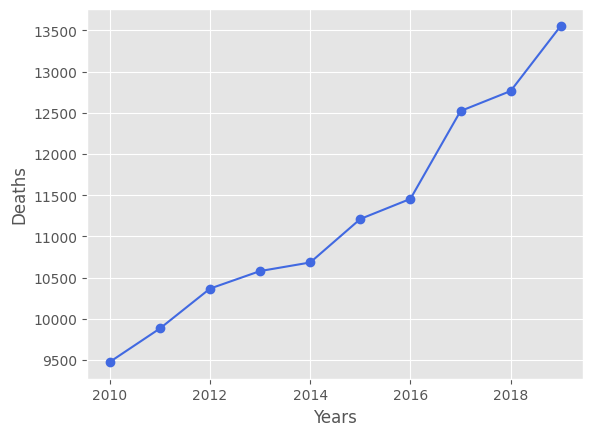

In [25]:
# Assuming you have a DataFrame called df with a 'Year' column
counts = df['Year'].value_counts().sort_index()

plt.style.use("ggplot")
# Criar o gráfico de linha
plt.plot(counts.index, counts.values, marker='o', linestyle='-', color='royalblue')

# Configurar os rótulos dos eixos
plt.xlabel('Years')
plt.ylabel('Deaths')

# Exibir o gráfico
plt.show()

In [26]:
# Get years old, when the people dead

df['Years_old'] = (df['Death_date'] - df['Born_date']).dt.days/365
df['Years_old'] = df['Years_old'].apply(lambda x: '{:.0f}'.format(x))
df.head()

,State,Year,Month,Death_date,Born_date,Gender,Race,Medical_assistance,Civil_state,Schooling,Occupation,City,Local,Years_old
0,AC,2010,1,2010-01-31,1999-11-09,Masculino,Parda,Em Branco,Solteiro/a,1 a 3 anos,ESTUDANTE,Tarauacá,Via pública,10
1,AC,2010,2,2010-02-07,1985-09-23,Masculino,Parda,Em Branco,Solteiro/a,1 a 3 anos,ESTUDANTE,Tarauacá,Hospital,24
2,AC,2010,2,2010-02-19,1995-08-06,Masculino,Parda,Em Branco,Solteiro/a,1 a 3 anos,ESTUDANTE,Tarauacá,Hospital,15
3,AC,2010,4,2010-04-20,1983-12-25,Feminino,Parda,Em Branco,Casado/a,1 a 3 anos,DONA DE CASA,Tarauacá,Domicílio,26
4,AC,2010,7,2010-07-24,1982-05-13,Masculino,Parda,Em Branco,Casado/a,NaN,DONA DE CASA,Tarauacá,Domicílio,28


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112491 entries, 0 to 112490
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   State               112491 non-null  object        
 1   Year                112491 non-null  int64         
 2   Month               112491 non-null  int64         
 3   Death_date          112491 non-null  datetime64[ns]
 4   Born_date           100749 non-null  datetime64[ns]
 5   Gender              112469 non-null  object        
 6   Race                109320 non-null  object        
 7   Medical_assistance  112491 non-null  object        
 8   Civil_state         103791 non-null  object        
 9   Schooling           84327 non-null   object        
 10  Occupation          60274 non-null   object        
 11  City                112491 non-null  object        
 12  Local               112031 non-null  object        
 13  Years_old           112491 no

In [28]:
min_age = df['Years_old'].min()
max_age = df['Years_old'].max()
average_age = df['Years_old'].median()

print(f'The youngest person to commit suicide was {min_age}, while the oldest was {max_age}, with an average age of {average_age}.')

The youngest person to commit suicide was -176, while the oldest was nan, with an average age of 40.0.


In [ ]:
df[df['Race'] == "Preta"]['Years_old'].mean()

39.312523505077095

In [ ]:
# Why have -176? let's see

df.isna().sum()

State                     0
Year                      0
Month                     0
Death_date                0
Born_date             11742
Gender                   22
Race                   3171
Medical_assistance        0
Civil_state            8700
Schooling             28164
Occupation            52217
City                      0
Local                   460
Years_old                 0
dtype: int64

In [ ]:
# We can assume that negative values occur because the date of birth is not registered. Therefore, we can set a minimum age for a child to be able to commit suicide.
# We will also remove these negative values from the "years_old" column, but we won't delete them from the dataframe since these rows might be important.

In [ ]:
# Now, we will transform all values that are less than 0 into NaN, so they don't affect our dataframe.

# import numpy
import numpy as np

df['Years_old'] = pd.to_numeric(df['Years_old'], errors='coerce')
df.loc[df['Years_old'] <= 4, 'Years_old'] = np.nan

In [ ]:
df.isna().sum()

State                     0
Year                      0
Month                     0
Death_date                0
Born_date             11742
Gender                   22
Race                   3171
Medical_assistance        0
Civil_state            8700
Schooling             28164
Occupation            52217
City                      0
Local                   460
Years_old             11965
dtype: int64

In [ ]:
# Let's check if there's any row with a value equal to or less than 4, as I don't believe it would be considered a suicide if that's the case.

xyz= df[df['Years_old'] <= 4].copy()
xyz.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   State               0 non-null      object        
 1   Year                0 non-null      int64         
 2   Month               0 non-null      int64         
 3   Death_date          0 non-null      datetime64[ns]
 4   Born_date           0 non-null      datetime64[ns]
 5   Gender              0 non-null      object        
 6   Race                0 non-null      object        
 7   Medical_assistance  0 non-null      object        
 8   Civil_state         0 non-null      object        
 9   Schooling           0 non-null      object        
 10  Occupation          0 non-null      object        
 11  City                0 non-null      object        
 12  Local               0 non-null      object        
 13  Years_old           0 non-null      float64       
dtypes: datetime

In [ ]:
xyz.head(20)

,State,Year,Month,Death_date,Born_date,Gender,Race,Medical_assistance,Civil_state,Schooling,Occupation,City,Local,Years_old


In [ ]:
# We noticed that there are 4 rows that fall under this criterion. Since it's a very small portion of the dataframe, we can delete them.

In [ ]:
# Let's drop those rows that we believe are not suicides because the person did not respond for themselves yet.

df.drop(df[df['Years_old'] <= 4].index, inplace=True)

In [ ]:
#Aqui vamos olhar dados como idade minima, media e maxima de suicidios no brasil.
min_age = df['Years_old'].min()
max_age = df['Years_old'].max()
average_age = df['Years_old'].median()

print(f'The youngest person to commit suicide was {min_age}, while the oldest was {max_age}, with an average age of {average_age}.')

The youngest person to commit suicide was 5.0, while the oldest was 113.0, with an average age of 40.0.


In [ ]:
# Ok, we have some nan values in born_date, this is the problem, we solve this problem with transform years_old < 0 in 0, but before, we should transform type of years_old

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112491 entries, 0 to 112490
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   State               112491 non-null  object        
 1   Year                112491 non-null  int64         
 2   Month               112491 non-null  int64         
 3   Death_date          112491 non-null  datetime64[ns]
 4   Born_date           100749 non-null  datetime64[ns]
 5   Gender              112469 non-null  object        
 6   Race                109320 non-null  object        
 7   Medical_assistance  112491 non-null  object        
 8   Civil_state         103791 non-null  object        
 9   Schooling           84327 non-null   object        
 10  Occupation          60274 non-null   object        
 11  City                112491 non-null  object        
 12  Local               112031 non-null  object        
 13  Years_old           100526 no

In [ ]:
df.head()

,State,Year,Month,Death_date,Born_date,Gender,Race,Medical_assistance,Civil_state,Schooling,Occupation,City,Local,Years_old
0,AC,2010,1,2010-01-31,1999-11-09,Masculino,Parda,Em Branco,Solteiro/a,1 a 3 anos,ESTUDANTE,TarauacÃ¡,Via pÃºblica,10.0
1,AC,2010,2,2010-02-07,1985-09-23,Masculino,Parda,Em Branco,Solteiro/a,1 a 3 anos,ESTUDANTE,TarauacÃ¡,Hospital,24.0
2,AC,2010,2,2010-02-19,1995-08-06,Masculino,Parda,Em Branco,Solteiro/a,1 a 3 anos,ESTUDANTE,TarauacÃ¡,Hospital,15.0
3,AC,2010,4,2010-04-20,1983-12-25,Feminino,Parda,Em Branco,Casado/a,1 a 3 anos,DONA DE CASA,TarauacÃ¡,DomicÃ­lio,26.0
4,AC,2010,7,2010-07-24,1982-05-13,Masculino,Parda,Em Branco,Casado/a,NaN,DONA DE CASA,TarauacÃ¡,DomicÃ­lio,28.0


In [ ]:
# Here, we will separate into a new dataset just to be able to create a heatmap graph.

deaths_state_year = df[['State', 'Year']]
deaths_state_year.head()

,State,Year
0,AC,2010
1,AC,2010
2,AC,2010
3,AC,2010
4,AC,2010


In [ ]:
# Let's create a new variable that counts the number of deaths (row by row), and then we will create a new column in this dataset to display it as an integer.
num_linhas = len(deaths_state_year)
deaths_state_year['Deaths'] = pd.Series(range(1, num_linhas + 1)).astype(int)

C:\Users\marco\AppData\Local\Temp\ipykernel_14980\1629768146.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deaths_state_year['Deaths'] = pd.Series(range(1, num_linhas + 1)).astype(int)


In [ ]:
deaths_state_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112491 entries, 0 to 112490
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   State   112491 non-null  object
 1   Year    112491 non-null  int64 
 2   Deaths  112491 non-null  int32 
dtypes: int32(1), int64(1), object(1)
memory usage: 2.1+ MB


In [ ]:
deaths_state_year.head()

,State,Year,Deaths
0,AC,2010,1
1,AC,2010,2
2,AC,2010,3
3,AC,2010,4
4,AC,2010,5


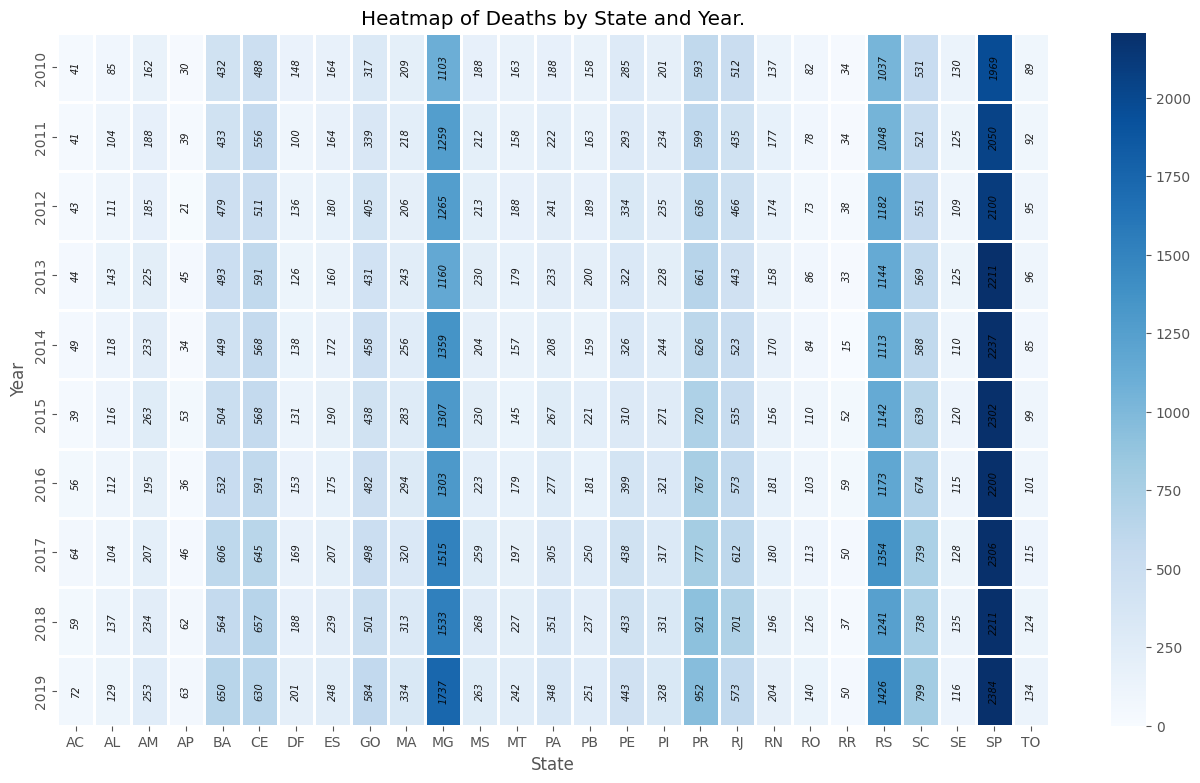

In [ ]:
# Here, we will create a heatmap to see which states have the highest number of deaths in the country.

import seaborn as sns

# Creating the heatmap using the pivot_table function.
heatmap_data = deaths_state_year.groupby(['Year', 'State']).size().unstack(fill_value=0)

annot_kws={'fontsize': 7, 
           'fontstyle':'italic',  
           'color':"black",
           'alpha':0.9, 
           'rotation':"vertical",
           'verticalalignment':'center'}

# Criando o heatmap
plt.figure(figsize=(16, 9))
sns.heatmap(heatmap_data, cmap='Blues', vmin= 0, fmt='g',robust=True, linewidths=1, annot=True ,annot_kws=annot_kws)
plt.title('Heatmap of Deaths by State and Year.')
plt.xlabel('State')
plt.ylabel('Year')
plt.show()